In [64]:
import tensorflow as tf
print(tf.keras.__version__)

3.5.0


# Task 1: Data Understanding and Visualization:
Download the Provided Data and Complete the following task.

**1. Load and visualize images from a dataset stored in directories, where each subdirec-
tory represents a class. You are expected to write a code:**

In [65]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# dataset path
train_dir = "/kaggle/input/fruitinamazon/FruitinAmazon/train"
test_dir = "/kaggle/input/fruitinamazon/FruitinAmazon/test"

**• Get the list of class directories from the train folder.**

In [66]:
class_directories = sorted(os.listdir(train_dir))
print("Class Directories:", class_directories)

Class Directories: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


**• Select one image randomly from each class.**

In [67]:
selected_images = []
selected_labels = []

for class_name in class_directories:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):  # ensuring that it's a directory
        filenames = os.listdir(class_path)
        if filenames:  # checking if there are images in the class directory
            random_filename = random.choice(filenames)
            img_path = os.path.join(class_path, random_filename)
            
            # load image using PIL in RGB mode 
            img = Image.open(img_path).convert("RGB")
            selected_images.append(img)  # keeping original color
            selected_labels.append(class_name)

**• Display the images in a grid format with two rows using matplotlib.**

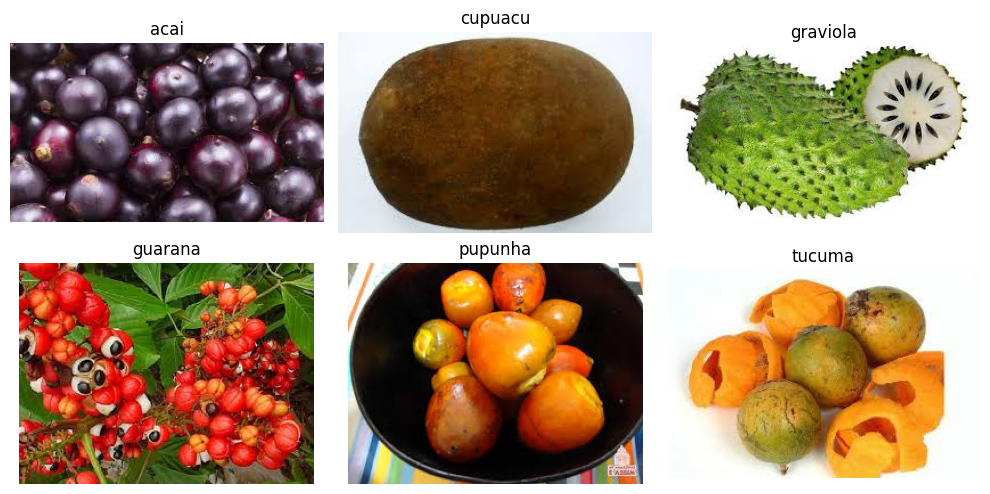

In [68]:
plt.figure(figsize=(10, 5))

num_classes = len(selected_images)
for i, img in enumerate(selected_images):
    plt.subplot(2, num_classes // 2 + (num_classes % 2), i + 1)
    plt.imshow(img)
    plt.title(selected_labels[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

 **What did you Observe?**

Each time the cell was executed, a random fruit image for each class was displayed as an output.

# 2. Check for Corrupted Image: 
**Write a script that verifies whether the image in the train
directory are valid. If any corrupted images are found, the script must remove the image from
the directory and print the message which image have been removed, if none found print ”No
Corrupted Images Found.”**

• Hint:
– Iterate through each class subdirectory and check if each image is valid.

– Use the Image.open() function to attempt to load each image.

– If the image is corrupted i.e. raises an IOError or SyntaxError, remove the image from
the directory and print f"Removed corrupted image: {image_path}".

– Maintain a list of all corrupted image paths for reporting.
• Expected Output: No corrupted images found.

In [69]:
import os
from PIL import Image

# maintaining a list of all corrupted image paths for reporting
corrupted_images = []

# iterating through each class subdirectory in the train directory
for class_name in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):  # Ensure it's a directory
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            try:
                # using the Image.open() function to attempt to load each image.
                with Image.open(img_path) as img:
                    img.verify()  # verifying if the image is valid
            except (IOError, SyntaxError):
                # Add to corrupted image list
                corrupted_images.append(img_path)
                # removing the corrupted image if the image is corrupted i.e. raises an IOError or SyntaxError, remove the image from the directory and print f"Removed corrupted image: {image_path}".
                os.remove(img_path)
                print(f"Removed corrupted image: {img_path}")

#  final result
if corrupted_images:
    print(f"Corrupted images were found and removed: {corrupted_images}")
else:
    print("No Corrupted Images Found.")

No Corrupted Images Found.


# Task 2: Loading and Preprocessing Image Data in keras:

In [70]:
import tensorflow as tf
# Define image size and batch size
img_height = 128  
img_width = 128  
batch_size = 32
validation_split = 0.2  # 80% training, 20% validation
# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]
# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',  
    label_mode='int',  
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)
# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))
# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',  # Corrected single quotes
    label_mode='int',   # Corrected single quotes
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)
# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


# Task 3 - Implement a CNN with

In [71]:
model = models.Sequential()

# Input Layer
model.add(tf.keras.Input(shape=(128, 128, 3)))

# Convolutional Layer 1
model.add(layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    padding='same',
    strides=1,
    activation='relu'
))

# Pooling Layer 1
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

# Convolutional Layer 2
model.add(layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    padding='same',
    strides=1,
    activation='relu'
))

# Pooling Layer 2
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

# Flatten Layer
model.add(layers.Flatten())

# Fully Connected Hidden Layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

# Output Layer (6 classes)
model.add(layers.Dense(6, activation='softmax'))


# Task 4: Compile the Model
**Model Compilation**

• Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).

In [72]:
model.compile(
    optimizer='adam',  # optimization algorithm
    loss='sparse_categorical_crossentropy',  # loss function for integer labels
    metrics=['accuracy']  # metrics to evaluate performance
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

# Task 5: Train the Model

**Model Training**
  
• Use the model.fit() function to train the model. Set the batch size to 16 and the number of epochs
to 250.
• Use val ds for validation.

• Use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model and avoid-
ing overfitting.

In [73]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Set training parameters
batch_size = 16
epochs = 250

# define callbacks
checkpoint_callback = ModelCheckpoint(
    filepath='best_model.keras',  # path to save the best model
    monitor='val_loss',        # monitor validation loss
    save_best_only=True,       # saving only the best model
    verbose=1                
)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',        # monitor validation loss
    patience=7,               # stop training if no improvement for 7 epochs
    verbose=1                  # printing messages during early stopping
)

# Train the model
history = model.fit(
    train_ds,                  # training dataset
    validation_data=val_ds,    # validation dataset
    batch_size=batch_size,     # batch size
    epochs=epochs,             # number of epochs
    callbacks=[checkpoint_callback, early_stopping_callback],  # Callbacks
    verbose=2                  # printing progress for each epoch
)

Epoch 1/250

Epoch 1: val_loss improved from inf to 1.40475, saving model to best_model.keras
3/3 - 3s - 868ms/step - accuracy: 0.1389 - loss: 2.0872 - val_accuracy: 0.3889 - val_loss: 1.4047
Epoch 2/250

Epoch 2: val_loss did not improve from 1.40475
3/3 - 1s - 287ms/step - accuracy: 0.2222 - loss: 1.8401 - val_accuracy: 0.0556 - val_loss: 2.0338
Epoch 3/250

Epoch 3: val_loss did not improve from 1.40475
3/3 - 1s - 277ms/step - accuracy: 0.3889 - loss: 1.6399 - val_accuracy: 0.1111 - val_loss: 1.7795
Epoch 4/250

Epoch 4: val_loss improved from 1.40475 to 1.27160, saving model to best_model.keras
3/3 - 1s - 310ms/step - accuracy: 0.4722 - loss: 1.4752 - val_accuracy: 0.8889 - val_loss: 1.2716
Epoch 5/250

Epoch 5: val_loss did not improve from 1.27160
3/3 - 1s - 282ms/step - accuracy: 0.6944 - loss: 1.2206 - val_accuracy: 0.6667 - val_loss: 1.2804
Epoch 6/250

Epoch 6: val_loss improved from 1.27160 to 0.91630, saving model to best_model.keras
3/3 - 1s - 482ms/step - accuracy: 0.6667

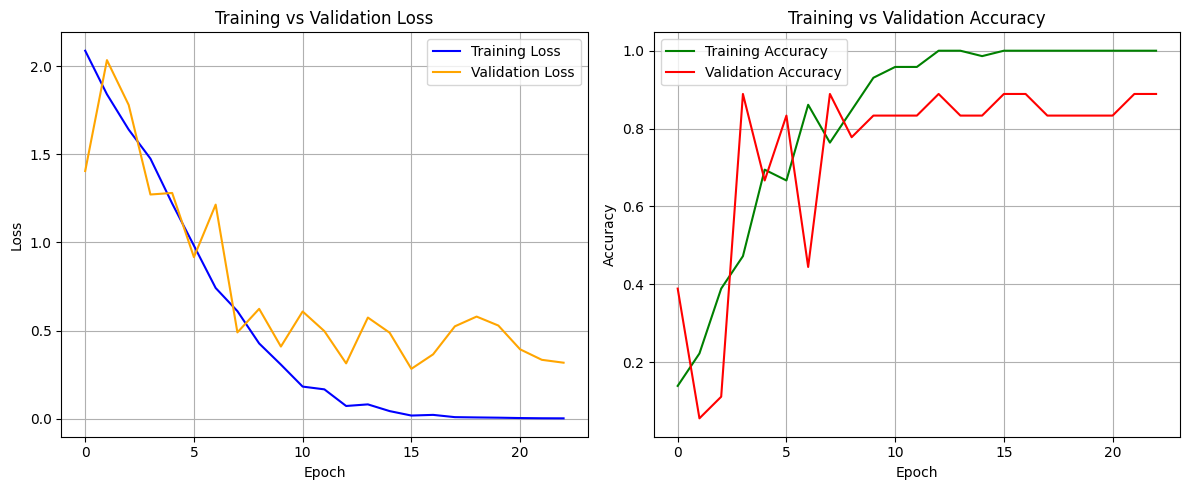

In [74]:
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Task 6: Evaluate the Model

**Model Evaluation**
  
• After training, evaluate the model using model.evaluate() on the test set to check the test
accuracy and loss.

In [75]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,  # Path to your test dataset
    labels='inferred',          # Inferred labels
    label_mode='int',           # Integer labels
    image_size=(128, 128),      # Image size (same as during training)
    interpolation='nearest',    # Interpolation method
    batch_size=32,              # Batch size
    shuffle=False               # Do not shuffle test data
)

# normalization to the test dataset
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 30 files belonging to 6 classes.


In [76]:
# evaluating the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds, verbose=2)

# printing the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 - 0s - 129ms/step - accuracy: 0.7000 - loss: 1.0361
Test Loss: 1.0361469984054565
Test Accuracy: 0.699999988079071


# Task 7: Save and Load the Model

**Model Saving and Loading**

• Save the trained model to an .h5 file using model.save().

• Load the saved model and re-evaluate its performance on the test set.

In [77]:
# Saving the trained model to an .h5 file
model.save("trained_model.h5")
print("Model saved to trained_model.h5")

from tensorflow.keras.models import load_model

# loading the saved model
loaded_model = load_model("trained_model.h5")
print("Model loaded successfully")

# re-evaluating the loaded model's performance on the test set
test_loss, test_accuracy = loaded_model.evaluate(test_ds, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Model saved to trained_model.h5
Model loaded successfully
1/1 - 0s - 396ms/step - accuracy: 0.7000 - loss: 1.0361
Test Loss: 1.0361469984054565
Test Accuracy: 0.699999988079071


# Task 8: Predictions and Classification Report

**Making Predictions**

• Use model.predict() to make predictions on test images.

• Convert the model’s predicted probabilities to digit labels using np.argmax().

• Also use from sklearn.metrics import classification report to report the Classification
Report of your Model Performance.

In [78]:
import numpy as np

# predictions from the model
predictions = model.predict(test_ds)

# converting predicted probabilities to class labels (integer format)
predicted_labels = np.argmax(predictions, axis=1)  # returns the indices of the max values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


In [79]:
# extracting true labels from test_ds
true_labels = np.concatenate([y.numpy() for x, y in test_ds], axis=0)

In [80]:
from sklearn.metrics import classification_report

# classification report
report = classification_report(true_labels, predicted_labels, target_names=class_directories)
print(report)

              precision    recall  f1-score   support

        acai       0.80      0.80      0.80         5
     cupuacu       0.38      0.60      0.46         5
    graviola       0.67      0.80      0.73         5
     guarana       0.83      1.00      0.91         5
     pupunha       1.00      0.60      0.75         5
      tucuma       1.00      0.40      0.57         5

    accuracy                           0.70        30
   macro avg       0.78      0.70      0.70        30
weighted avg       0.78      0.70      0.70        30

